### ROC曲线描述FPR和TPR的关系

### TPR = recall = TP / (TP + FN)
### FPR = FP / (FP + TN)

In [1]:
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
digits = ds.load_digits()
X = digits.data
y = digits.target.copy()

In [3]:
y[digits.target ==9 ] = 1
y[digits.target !=9 ] = 0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
log_res = LogisticRegression()
log_res.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
decision_scores = log_res.decision_function(X_test)

In [7]:
from sklearn.metrics import roc_curve

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

In [9]:
fpr.shape, tpr.shape, thresholds.shape

((22,), (22,), (22,))

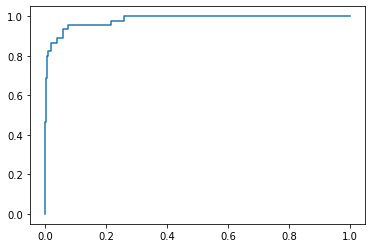

In [10]:
plt.plot(fpr, tpr)

### 计算面积

In [11]:
from sklearn.metrics import roc_auc_score

In [12]:
roc_auc_score(y_test, decision_scores)

0.9823319615912208